In [1]:
%matplotlib inline

In [2]:
from skimage.io import imread
from PIL import Image, ImageFilter
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

<p style="font-size: 18px; text-align: center; color: brown;" > Van Gogh, Colors and other Stories

<p style = "text-align: center; color: brown" > Irina Nedyalkova's Data Science Project

<p style="text-align: center; color: brown" > Summer 2023, Saint Vlas, Bulgaria

Vincent van Gogh was born in 1853 in the Netherlands, he decided to become an artist at the age of 27. This decision would change art history forever. In the famous, touching letters Vincent sent his brother Theo, he often included little sketches and even drawings of what he had seen. So, Theo advised him to concentrate on his drawings. But the rest is not easy going history. There was a long sad path and a woman, Theo van Gogh's wife.

I have chosen three paintings, which Vincent painted in 1888 in Arles (France), to perform nowadays *Image Processing*. To reflect the early signs of spring, he used delicate brushstrokes and pastel shades for *Blossoming Almond branch in a Glass with a Book*.

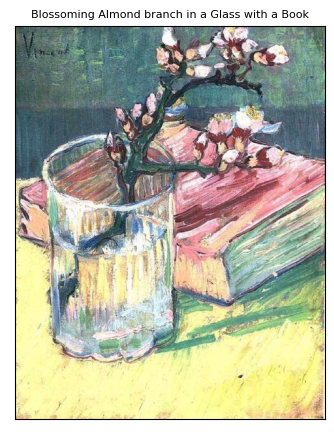

In [4]:
blossom_image = imread("blossoming.jpg")

plt.figure(figsize = (4, 7))

plt.xticks([])
plt.yticks([])

plt.title("Blossoming Almond branch in a Glass with a Book", size = 8)

plt.imshow(blossom_image)

In this document Vincent's painting is an image and images are matrices of pixels. Each pixel is an array of three values - red, green and blue. RGB is a color model in which the Red, the Green and the Blue are primary colors, and are added together in various ways to reproduce a broad array of colors. Their integer values are from 0 to 255 as follows:

In [5]:
red = blossom_image[:, :, 0]
green = blossom_image[:, :, 1]
blue = blossom_image[:, :, 2]

In [6]:
blossom_image

array([[[  0,  16,   9],
        [ 38,  59,  52],
        [ 55,  76,  69],
        ...,
        [127, 124, 115],
        [127, 124, 115],
        [126, 123, 114]],

       [[ 28,  47,  41],
        [ 43,  62,  56],
        [ 52,  73,  66],
        ...,
        [126, 123, 114],
        [128, 125, 116],
        [129, 126, 117]],

       [[ 60,  79,  73],
        [ 52,  71,  65],
        [ 52,  73,  66],
        ...,
        [120, 117, 108],
        [124, 121, 112],
        [127, 124, 115]],

       ...,

       [[218, 179, 138],
        [217, 178, 137],
        [214, 175, 132],
        ...,
        [241, 237, 228],
        [255, 254, 249],
        [251, 253, 250]],

       [[210, 171, 130],
        [212, 173, 132],
        [210, 171, 128],
        ...,
        [253, 249, 240],
        [255, 255, 250],
        [246, 251, 247]],

       [[215, 173, 133],
        [217, 175, 135],
        [215, 173, 131],
        ...,
        [252, 248, 239],
        [255, 255, 250],
        [250, 255, 251]]

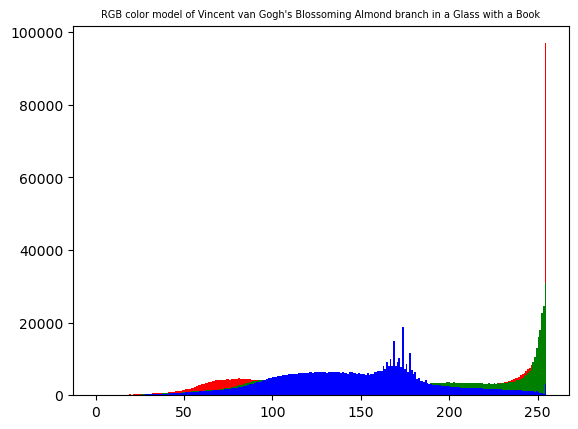

In [7]:
plt.hist(red.ravel(), bins = 256, color = "red")
plt.hist(green.ravel(), bins = 256, color = "green")
plt.hist(blue.ravel(), bins = 256, color = "blue")

plt.title("RGB color model of Vincent van Gogh's Blossoming Almond branch in a Glass with a Book", size = 7)

plt.show()

The way human see colors can not be used in machines. Machines understand color models - a mathematical approximation of the human nature visual perception. Usually, in RGB a pixel is represented using 8 bits for each Red, Green and Blue (dtype=uint8). Please, call to mind the color coordinate system shown above. We will come back to it in a minute.

Now I will use the Gaussian Blur to describe the transformation of each pixel in the first image. This effect is used to reduce image noise and to average out rapid changes in pixel intensity. It makes the color transition from one side of an edge to another smooth rather than sudden. The Gaussian Blur is the result of blurring an image by a Gaussian function and is named after the German mathematician and scientist Carl Friedrich Gauss.

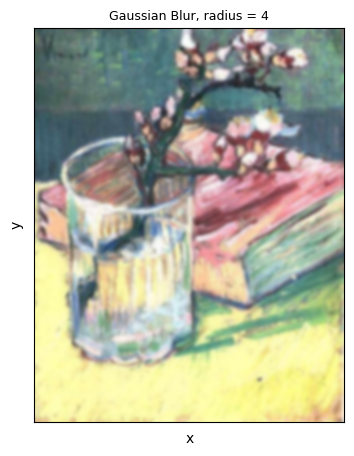

In [8]:
blossom_image = Image.open("blossoming.jpg")

blossom_blur = blossom_image.filter(ImageFilter.GaussianBlur(radius = 4))

# radius defines the value of the deviation to the Gaussian function; a larger value will create more blur

# radius 4 smooths pixel intensity but still defines the image

plt.figure(figsize = (4, 7))

plt.xticks([])
plt.yticks([])

plt.xlabel("x")
plt.ylabel("y")

plt.title("Gaussian Blur, radius = 4", size = 9)

plt.imshow(blossom_blur)

An image can also be represented as a 2D function *f = (x, y)* where *x* and *y* are spatial coordinates. The spatial coordinates enable us to specify a location in the image with greater granularity than pixel coordinates (pixel coordinates are arrays of pixels arranged in columns and rows). In fact, pixels are the elements of the image that contain information about intensity and color. But lets explore another painting of Vincent's:

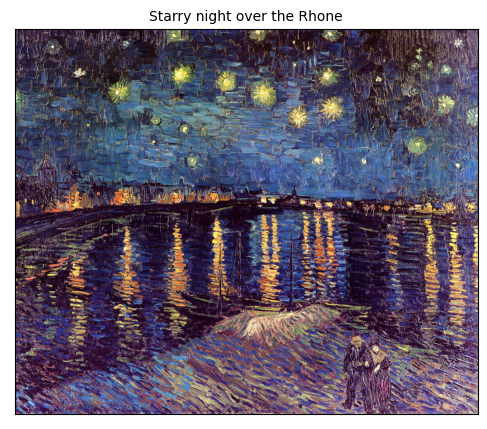

In [9]:
stars_image = imread("starry_night.jpg")

plt.figure(figsize = (7, 5))

plt.xticks([])
plt.yticks([])

plt.title("Starry night over the Rhone", size = 10)

plt.imshow(stars_image)

The second painting is *Starry night over the Rhone*. The challenge of painting at night intrigued Vincent. He also wanted to know how colors work and studied lots of books on Colour Theory. Depicting color was of great importance to him and he often described objects in terms of colors. "There are colors that make each other shine like husband and wife."

Computers define each color value within a range of 0 to 255 (remember from the first image?) Each color is made up of the three primary colors - Red, Green and Blue - the mix of the three gives us millions of different colors and a huge color palette.

In [10]:
red = stars_image[:, :, 0]
green = stars_image[:, :, 1]
blue = stars_image[:, :, 2]

In [11]:
stars_image

array([[[ 45,  19,  67],
        [ 54,  28,  76],
        [ 64,  40,  90],
        ...,
        [ 89,  79, 131],
        [180, 170, 222],
        [226, 216, 255]],

       [[ 40,  14,  62],
        [ 47,  21,  69],
        [ 58,  34,  84],
        ...,
        [ 90,  77, 131],
        [157, 144, 198],
        [187, 174, 228]],

       [[ 40,  14,  62],
        [ 42,  18,  66],
        [ 51,  29,  78],
        ...,
        [ 89,  71, 131],
        [127, 109, 169],
        [140, 122, 182]],

       ...,

       [[104,  63,  69],
        [ 93,  52,  60],
        [100,  57,  67],
        ...,
        [183, 179, 152],
        [175, 171, 144],
        [160, 156, 129]],

       [[139,  98, 104],
        [134,  91, 100],
        [143,  97, 108],
        ...,
        [191, 192, 152],
        [197, 198, 158],
        [193, 194, 154]],

       [[183, 140, 149],
        [179, 136, 145],
        [187, 139, 151],
        ...,
        [196, 198, 151],
        [211, 213, 166],
        [215, 217, 170]]

Above shown the array of each pixel in RGB model and below is the histogram of that Red-Green-Blue model in color coordinate system. This system is the process of mixing the three primary colors in different proportions to make more different colors. As Vincent van Gogh predicted in 1888: "The painter of the future is a colorist such as there has not been before."

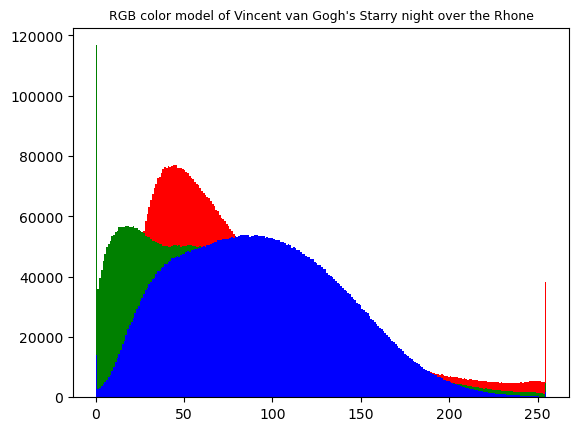

In [12]:
plt.hist(red.ravel(), bins = 256, color = "red")
plt.hist(green.ravel(), bins = 256, color = "green")
plt.hist(blue.ravel(), bins = 256, color = "blue")

plt.title("RGB color model of Vincent van Gogh's Starry night over the Rhone", size = 9)

plt.show()

The two histograms are very different, right? Let us compare:

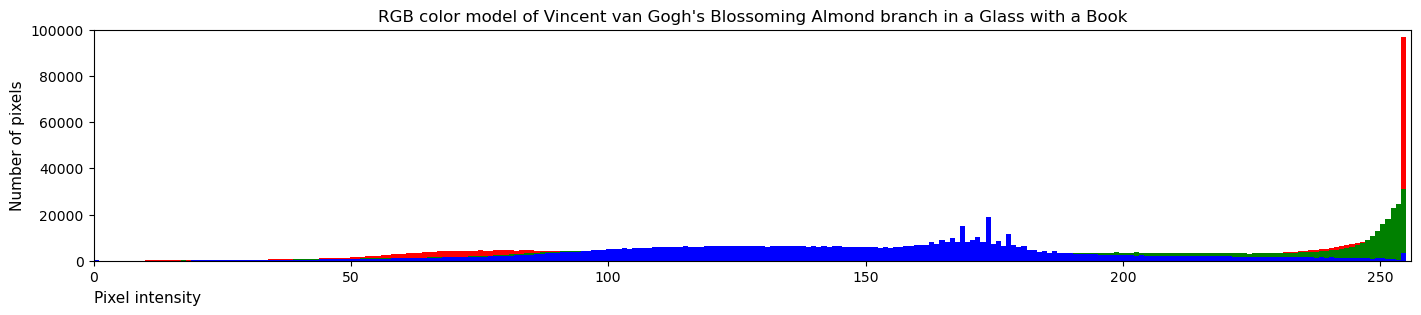

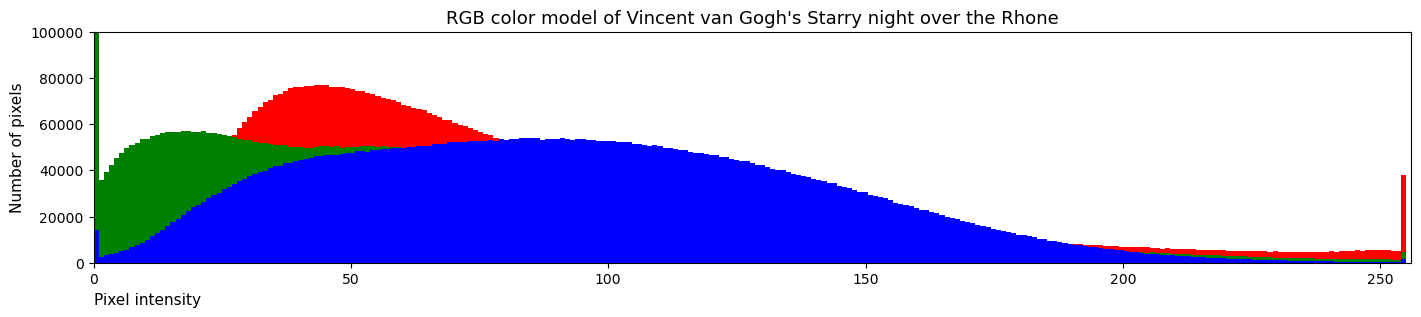

In [13]:
blossom_image = imread("blossoming.jpg")   # first painting

red_1 = blossom_image[:, :, 0]
green_1 = blossom_image[:, :, 1]
blue_1 = blossom_image[:, :, 2]

plt.figure(figsize = (17, 3))

plt.xlim(0, 256)
plt.ylim(0, 100000)

plt.hist(red_1.ravel(), bins = 256, color = "red")
plt.hist(green_1.ravel(), bins = 256, color = "green")
plt.hist(blue_1.ravel(), bins = 256, color = "blue")

plt.xlabel("Pixel intensity", size = 11, loc = "left")
plt.ylabel("Number of pixels", size = 11)

plt.title("RGB color model of Vincent van Gogh's Blossoming Almond branch in a Glass with a Book", size = 12)


stars_image = imread("starry_night.jpg")  # second painting

red_2 = stars_image[:, :, 0]
green_2 = stars_image[:, :, 1]
blue_2 = stars_image[:, :, 2]

plt.figure(figsize = (17, 3))

plt.xlim(0, 256) 
plt.ylim(0, 100000) 

plt.hist(red_2.ravel(), bins = 256, color = "red")
plt.hist(green_2.ravel(), bins = 256, color = "green")
plt.hist(blue_2.ravel(), bins = 256, color = "blue")

plt.xlabel("Pixel intensity", size = 11, loc = "left")
plt.ylabel("Number of pixels", size = 11)

plt.title("RGB color model of Vincent van Gogh's Starry night over the Rhone", size = 13)


plt.show()

Histograms visualize how much proportion red, green, blue are there in a picture and are an important tool for inspecting images. Typically, zero is darkness for no pixel intensity and 255 is light for high pixel intensity, so when the histogram values are concentrated toward the right - the image is lighter (first painting) and when they are concentrated toward the left - the image is darker (second painting). The RGB color model is some kind of statistics for colors in an image.

As mentioned before, a single pixel has 3 values - one for the Red, one for the Green and one for the Blue - think of them as 3 buckets filled with color:
- Black is the absence of color, so to create black, we empty the color buckets (0, 0, 0)
- White is the presence of all color, so to create white, we fill each bucket completely with color (255, 255, 255)
- for pure Red, we fill up the red bucket (255, 0, 0)
- for pure Green, we fill up the green bucket (0, 255, 0)
- for pure Blue, we fill up the blue bucket (0, 0, 255)

This is the RGB color model. Three values stored in an array.

With the help of the second painting I will show K-Means clustering. This is a common method to find the dominant colors in an image. The technique involves clustering the pixels into smaller number of groups and representing each group by its mean color. The resulting image has fewer colors then, which reduces the file size if needed.

In [14]:
vectorized = stars_image.reshape((-1, 3))   # first need to convert 
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)   # than K-Means requires parameters
K = 3
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)   # 8-bit unsigned integer 0 to 255 
res = center[label.flatten()]

image_k = res.reshape((stars_image.shape))

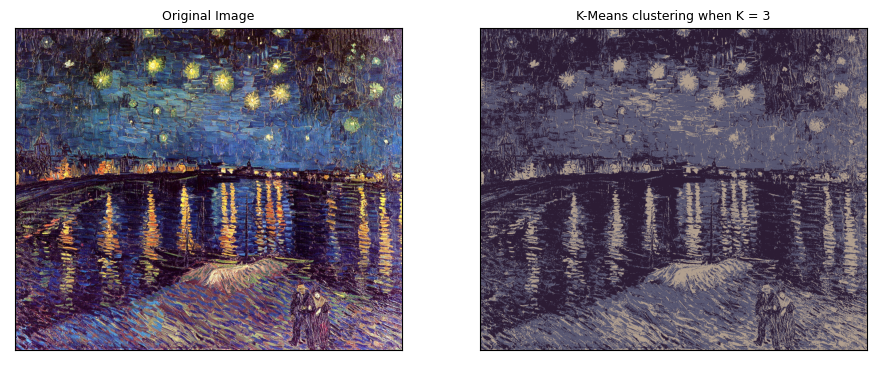

In [15]:
plt.figure(figsize = (11, 9))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title("Original Image", size = 9)
plt.imshow(stars_image)

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title("K-Means clustering when K = 3", size = 9)
plt.imshow(image_k)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


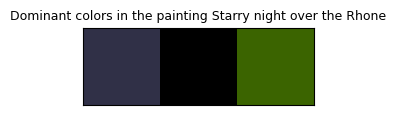

In [16]:
stars_image = imread("starry_night.jpg")

r = []
g = []
b = []
for row in stars_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
stars_image_df = pd.DataFrame({"red": r, "green": g, "blue": b})  # saving as DataFrame

stars_image_df["scaled_color_red"] = whiten(stars_image_df["red"])
stars_image_df["scaled_color_green"] = whiten(stars_image_df["green"])
stars_image_df["scaled_color_blue"] = whiten(stars_image_df["blue"])

cluster_centers, _ = kmeans(stars_image_df[["scaled_color_red", "scaled_color_green", "scaled_color_blue"]], 3)

dominant_colors = []
red_std, green_std, blue_std = stars_image_df[["red", "green", "blue"]].std()  # standard deviation of each color

for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
    dominant_colors.append((red_scaled * red_std / 255,
                           green_scaled * green_std / 255,
                           blue_scaled * blue_std / 255)) 

plt.figure(figsize = (4, 1))
plt.title("Dominant colors in the painting Starry night over the Rhone", size = 9)
plt.xticks([])
plt.yticks([])

plt.imshow([dominant_colors])

plt.show()

The third and last painting I use to show nowadays Image Processing, is Vincent van Gogh's *Still life with blue Coffeepot*. You see the brilliant contrast of the colors and below just blue shades by *OpenCV* (*cv2*) which prints in Blue-Green-Red (BGR) model. Image processing helps to improve scientific and medicinal research. It captures important details for various of businesses as well.

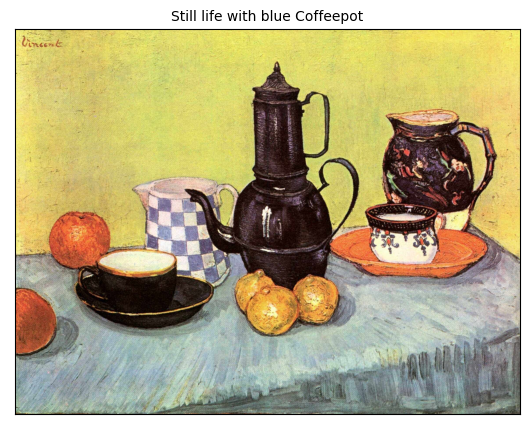

In [17]:
blue_image = imread("still_life_blue.jpg")

plt.figure(figsize = (8, 5))

plt.xticks([])
plt.yticks([])

plt.title("Still life with blue Coffeepot", size = 10)

plt.imshow(blue_image)

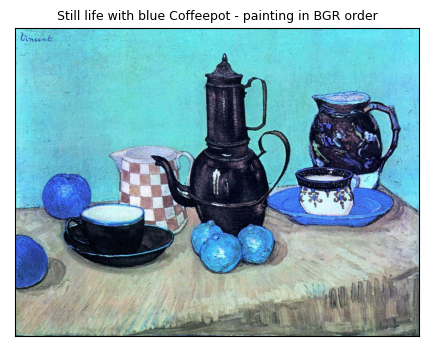

In [18]:
blue_image = cv2.imread("still_life_blue.jpg")

plt.figure(figsize = (7, 4))

plt.xticks([])
plt.yticks([])

plt.title("Still life with blue Coffeepot - painting in BGR order", size = 9)

plt.imshow(blue_image)

Today's Data Science allows us to convert an image to a digital aspect and perform certain functions on it. As Vincent did ca. 130 years ago - he produced one color study after another. He was eager to know which color combinations create the most powerful effect or how many variations are there of a single color.

During his life, Vincent van Gogh have sold just 1 painting. One painting. He was so sad about that but still inspired by the surroundings. Vincent left over 850 paintings and almost 1300 works on paper. I made some research by myself and found the location of 210 paintings placed on three continents.

In [19]:
locations = pd.read_excel("Vincent paintings location.xlsx")

In [20]:
locations

,Name of Painting,Year Painted,Place Painted,Place Now,Country of Museum,Name of Museum
0,Edge of a Wheat Field with Poppies,1887,Nuenen,Colorado,USA,Denver Art Museum
1,A peasant Woman digging in front of her Cottage,1885,Nuenen,Chicago,USA,The Art Institute of Chicago
2,Terrace and Observation Deck at the Moulin de ...,1887,Paris,Chicago,USA,The Art Institute of Chicago
3,Self-portrait,1887,Paris,Chicago,USA,The Art Institute of Chicago
4,Fishing in Spring,1887,Paris,Chicago,USA,The Art Institute of Chicago
...,...,...,...,...,...,...
205,Pont du Carrousel and the Louvre,1886,Paris,Copenhagen,Denmark,Ny Carlsberg Glyptotek
206,Pink Roses,1890,Auvers sur Oise,Copenhagen,Denmark,Ny Carlsberg Glyptotek
207,Landscape from Saint Remy,1889,Saint Remy de Provence,Copenhagen,Denmark,Ny Carlsberg Glyptotek
208,"Olive Grove, Saint Remy",1889,Saint Remy de Provence,Gothenburg,Sweden,Gothenburg Museum of Art


Above you see the DataFrame with its rows and columns. We can extract information nice and easily. For example, we see what columns do we have...

In [21]:
locations.columns

Index(['Name of Painting', 'Year Painted', 'Place Painted', 'Place Now',
       'Country of Museum', 'Name of Museum'],
      dtype='object')

...and in doing so we can work with a specific column. Let's print 3 rows from the first year and 3 rows from the last year:

In [22]:
locations.nsmallest(3, "Year Painted")   # the number tells how many rows we wish to display

,Name of Painting,Year Painted,Place Painted,Place Now,Country of Museum,Name of Museum
85,Still life with Straw Hat,1881,Gravenhage,Otterlo,Netherlands,Kröller-Müller Museum
86,Still life with Clogs,1881,Gravenhage,Otterlo,Netherlands,Kröller-Müller Museum
79,Girl in a Wood,1882,Gravenhage,Otterlo,Netherlands,Kröller-Müller Museum


In [23]:
locations.nlargest(3, "Year Painted")   # the number tells how many rows we wish to display

,Name of Painting,Year Painted,Place Painted,Place Now,Country of Museum,Name of Museum
20,View of Vessenots near Auvers,1890,Auvers sur Oise,Madrid,Spain,Museo Nacional Thyssen-Bornemisza
27,Marguerite Gachet at the Piano,1890,Auvers sur Oise,Basel,Switzerland,Kunstmuseum Basel
29,Die Ebene von Auvers,1890,Auvers sur Oise,Vienna,Austria,Österreichische Galerie Belvedere


There are two paintings from year 1881 in the DataFrame and equally I will take two paintings from the last year, 1890, to visualize if Vincent somehow changed his color palette through the years:

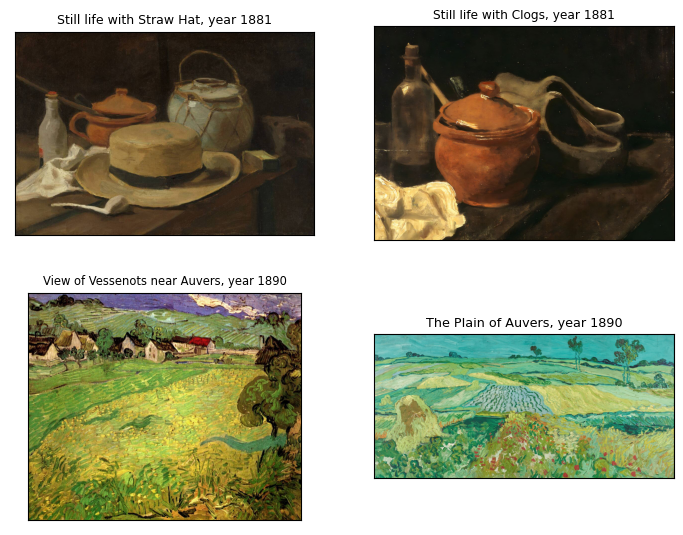

In [24]:
plt.figure(figsize = (8.5, 6.5))

rows = 2
columns = 2

first_image = imread("still_life_with_hat.jpg")
second_image = imread("still_life_with clogs_1881.jpg")
third_image = imread("view_vessenots_near_auvers.jpg")
fourth_image = imread("the plain of auvers.jpg")
# I skip the painting on position 27 because it's a long painting and fits not well on the 4-paintings grid below

plt.subplot(rows, columns, 1)
plt.xticks([])
plt.yticks([])
plt.title("Still life with Straw Hat, year 1881", size = 9)
plt.imshow(first_image)

plt.subplot(rows, columns, 2)
plt.xticks([])
plt.yticks([])
plt.title("Still life with Clogs, year 1881", size = 8.75)
plt.imshow(second_image)

plt.subplot(rows, columns, 3)
plt.xticks([])
plt.yticks([])
plt.title("View of Vessenots near Auvers, year 1890", size = 8.3)
plt.imshow(third_image)

plt.subplot(rows, columns, 4)
plt.xticks([])
plt.yticks([])
plt.title("The Plain of Auvers, year 1890", size = 9.2)   # English name of "Die Ebene von Auvers", listed in the DataFrame
plt.imshow(fourth_image)

plt.show()   # I just love how the paintings appear in the document like magic

In my research I have discovered that *Still life with Clogs* is Vincent van Gogh's first painting (Wow!). In November 1881 he took his first painting lesson from his cousin by marriage Anton Mauve (until that time he had made only drawings). He wrote to his brother Theo: "Well, Mauve immediately installed me in front of a still life consisting of a couple of old clogs and other objects, and so I could set to work." But later, in Paris, Vincent started developing his own, well-known style with bright colors. It gets more clear from the paintings shown above.

Vincent van Gogh really developed as an artist - from drawings into paintings into *colour science*. "Instead of trying to reproduce exactly what I see, I make more arbitrary use of colour to express myself with force." Unfortunately, the summer of 1890 is last-moments-painting. Vincent died on 29 July. A half year later, his brother Theo also passes away and left his wife, Johanna (Jo) van Gogh, with their baby son and an apartment full of paintings.

In [25]:
locations.columns

Index(['Name of Painting', 'Year Painted', 'Place Painted', 'Place Now',
       'Country of Museum', 'Name of Museum'],
      dtype='object')

In my DataFrame we have the countries and the names of the museums where we can find the 210 paintings I made research about. DataFrames are flexible and intuitive way of storing and working with data. If we are visiting France, we can check if there are some Van Gogh paintings to swoon in front of:

In [26]:
locations[(locations["Country of Museum"] == "France")]

,Name of Painting,Year Painted,Place Painted,Place Now,Country of Museum,Name of Museum
21,Wagons de chemin de fer a Arles,1888,Arles,Avignon,France,Musée Angladon – Collection Jacques Doucet
30,Peasant Woman by the Fireplace,1890,Nuenen,Paris,France,"Musée d'Orsay, Paris, France"
31,Imperial crown fritillaries in a copper vase,1887,Antwerpen,Paris,France,"Musée d'Orsay, Paris, France"
32,The Guinguette in Montmartre,1886,Antwerpen,Paris,France,"Musée d'Orsay, Paris, France"
33,The Restaurant de la Sirene in Asniéres,1887,Antwerpen,Paris,France,"Musée d'Orsay, Paris, France"
34,Portrait of the Artist,1887,Antwerpen,Paris,France,"Musée d'Orsay, Paris, France"
35,The Italian Woman,1887,Antwerpen,Paris,France,"Musée d'Orsay, Paris, France"
36,"Caravans, Gypsy Camp near Arles",1888,Arles,Paris,France,"Musée d'Orsay, Paris, France"
37,Starry Night over the Rhone,1888,Arles,Paris,France,"Musée d'Orsay, Paris, France"
38,The Bedroom at Arles,1889,Arles,Paris,France,"Musée d'Orsay, Paris, France"


Voila! So many paintings just in Paris! As you can see *Starry Night over the Rhone* (37) is placed in Paris. But where are the other two paintings now?

*Still life with blue Coffeepot* is in private collection of Basil and Elise Goulandris Foundation, open to the public in their new museum in Athens.

My lovely *Blossoming Almond branch in a Glass with a Book* is in private collection in Japan.

The paintings, the drawings and the letters (we know today) are the unconditional support and strength of a family. The Van Gogh Family turned a family collection into a world-famous-collection. While *Image Processing* gives machines and robots the ability to see, act and learn like humans do.

I view life as a sequence of talents, bringing past and future together. With much love and respect, I dedicate this digital work to Vincent van Gogh, Theo van Gogh, Johanna van Gogh Bonger and baby son Vincent Willem who is the founder of the Van Gogh Museum in Amsterdam.

________

References:

1. Van Gogh Museum Amsterdam, all quotes in the document are Vincent's from his letters to Theo.
2. Image Segmentation by Emmanuel Kendagor
3. Teens in AI